In [1]:
# export
# yet to handle logic for that

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import os, PIL, mimetypes
from pathlib import Path

In [4]:
# download aws link 

In [5]:
os.path.exists('./imagenette-160')

True

In [6]:
path = Path('./imagenette-160')

In [7]:
[23,43,5,6,7]

[23, 43, 5, 6, 7]

In [8]:
#[path for path in path.iterdir() if path.is_dir()]

In [9]:
Path.ls = lambda x: list(x.iterdir()) 

In [10]:
path.ls()

[PosixPath('imagenette-160/.DS_Store'),
 PosixPath('imagenette-160/train'),
 PosixPath('imagenette-160/val')]

In [11]:
(path/'val/').ls()

[PosixPath('imagenette-160/val/n03394916'),
 PosixPath('imagenette-160/val/n03417042'),
 PosixPath('imagenette-160/val/n03445777'),
 PosixPath('imagenette-160/val/n02102040'),
 PosixPath('imagenette-160/val/n03425413'),
 PosixPath('imagenette-160/val/n03888257'),
 PosixPath('imagenette-160/val/n03028079'),
 PosixPath('imagenette-160/val/n03000684'),
 PosixPath('imagenette-160/val/n01440764'),
 PosixPath('imagenette-160/val/n02979186')]

In [12]:
path_image_dir = (path/'val/').ls()[0]

In [13]:
path_image_dir

PosixPath('imagenette-160/val/n03394916')

In [14]:
path_image = path_image_dir.ls()[0]

In [15]:
path_image

PosixPath('imagenette-160/val/n03394916/ILSVRC2012_val_00046669.JPEG')

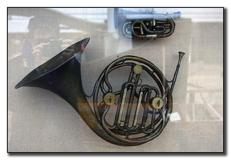

In [16]:
img = PIL.Image.open(path_image)
img

In [17]:
import numpy as np
imga = np.array(img)
imga.shape

(160, 231, 3)

In [18]:
imga[:10, :10, 0] # numpy arrays 

array([[255, 250, 255, 251, 244, 255, 255, 255, 255, 255],
       [255, 242, 251, 253, 255, 255, 243, 251, 255, 255],
       [255, 252, 255, 254, 255, 255, 248, 255, 255, 255],
       [250, 255, 255, 251, 255, 255, 252, 255, 254, 254],
       [253, 253, 247, 254, 255, 255, 251, 243, 255, 255],
       [255, 251, 248, 255, 255, 247, 255, 255, 255, 255],
       [255, 255, 255, 255, 243, 248, 255, 213, 227, 227],
       [245, 255, 255, 255, 249, 255, 218,  57,  51,  51],
       [255, 255, 253, 255, 255, 254, 226,  51, 142, 144],
       [255, 255, 253, 255, 255, 254, 226,  51, 145, 146]], dtype=uint8)

In [19]:
mimetypes.types_map

{'.a': 'application/octet-stream',
 '.ai': 'application/postscript',
 '.aif': 'audio/x-aiff',
 '.aifc': 'audio/x-aiff',
 '.aiff': 'audio/x-aiff',
 '.au': 'audio/basic',
 '.avi': 'video/x-msvideo',
 '.bat': 'text/plain',
 '.bcpio': 'application/x-bcpio',
 '.bin': 'application/octet-stream',
 '.bmp': 'image/x-ms-bmp',
 '.c': 'text/plain',
 '.cdf': 'application/x-netcdf',
 '.cpio': 'application/x-cpio',
 '.csh': 'application/x-csh',
 '.css': 'text/css',
 '.csv': 'text/csv',
 '.dll': 'application/octet-stream',
 '.doc': 'application/msword',
 '.dot': 'application/msword',
 '.dvi': 'application/x-dvi',
 '.eml': 'message/rfc822',
 '.eps': 'application/postscript',
 '.etx': 'text/x-setext',
 '.exe': 'application/octet-stream',
 '.gif': 'image/gif',
 '.gtar': 'application/x-gtar',
 '.h': 'text/plain',
 '.hdf': 'application/x-hdf',
 '.htm': 'text/html',
 '.html': 'text/html',
 '.ico': 'image/vnd.microsoft.icon',
 '.ief': 'image/ief',
 '.jpe': 'image/jpeg',
 '.jpeg': 'image/jpeg',
 '.jpg': 'imag

In [20]:
image_extensions = set(k for k,v in mimetypes.types_map.items() if(v.startswith('image/')))

In [21]:
image_extensions

{'.bmp',
 '.gif',
 '.ico',
 '.ief',
 '.jpe',
 '.jpeg',
 '.jpg',
 '.pbm',
 '.pgm',
 '.png',
 '.pnm',
 '.ppm',
 '.ras',
 '.rgb',
 '.svg',
 '.tif',
 '.tiff',
 '.xbm',
 '.xpm',
 '.xwd'}

In [22]:
a = ' '.join(image_extensions)

In [23]:
a.split(' + ')

['.png .ico .ief .tif .tiff .jpe .svg .xpm .bmp .ras .xbm .ppm .rgb .gif .jpeg .jpg .pnm .xwd .pbm .pgm']

In [24]:
def setify1(o): return o if isinstance(o, set) else set(list(o))

In [25]:
setify1('aa') == {'aa'}

False

In [49]:
def listify(o):
    if o is None: return []
    if isinstance(o, list): return o
    if isinstance(o, str): return [o]
    if isinstance(o, Iterable): return list(o)
    return [o]

In [50]:
def setify(o): return o if isinstance(o, set) else set(listify(o))

In [51]:
def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

In [52]:
setify('aa') == {'aa'}

True

In [53]:
setify(['aa',1]) == {'aa',1}

True

In [54]:
setify(None) == set()

True

In [55]:
setify({1}) == {1}

True

In [86]:
#setify1(1) == {1}

In [57]:
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [58]:
t = [o.name for o in os.scandir(path_image_dir)]
t = _get_files(path, t, extensions=image_extensions)
t[:3]

[PosixPath('imagenette-160/ILSVRC2012_val_00046669.JPEG'),
 PosixPath('imagenette-160/ILSVRC2012_val_00033682.JPEG'),
 PosixPath('imagenette-160/ILSVRC2012_val_00005548.JPEG')]

In [59]:
t[:3]

[PosixPath('imagenette-160/ILSVRC2012_val_00046669.JPEG'),
 PosixPath('imagenette-160/ILSVRC2012_val_00033682.JPEG'),
 PosixPath('imagenette-160/ILSVRC2012_val_00005548.JPEG')]

In [60]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [61]:
get_files(path_image_dir, image_extensions)[:3]

[PosixPath('imagenette-160/val/n03394916/ILSVRC2012_val_00046669.JPEG'),
 PosixPath('imagenette-160/val/n03394916/ILSVRC2012_val_00033682.JPEG'),
 PosixPath('imagenette-160/val/n03394916/ILSVRC2012_val_00005548.JPEG')]

In [62]:
get_files(path, image_extensions, recurse=True)[:3]

[PosixPath('imagenette-160/train/n03394916/n03394916_58454.JPEG'),
 PosixPath('imagenette-160/train/n03394916/n03394916_32588.JPEG'),
 PosixPath('imagenette-160/train/n03394916/n03394916_32422.JPEG')]

In [63]:
all_fns = get_files(path, image_extensions, recurse=True)
len(all_fns)

13394

In [64]:
%timeit -n 10 get_files(path, image_extensions, recurse=True)

79.3 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Preparing for modelling 

What we need to do:

- Get files
- Split validation set
random%, folder name, csv, ...
- Label:
folder name, file name/re, csv, ...
- Transform per image (optional)
- Transform to tensor
- DataLoader
- Transform per batch (optional)
- DataBunch
- Add test set (optional)

In [65]:
class ListContainer():
    def __init__(self, items): self.items = listify(items)
    def __getitem__(self, idx):
        try: return self.items[idx]
        except TypeError:
            if isinstance(idx[0],bool):
                assert len(idx)==len(self) # bool mask
                return [o for m,o in zip(idx,self.items) if m]
            return [self.items[i] for i in idx]
    def __len__(self): return len(self.items)
    def __iter__(self): return iter(self.items)
    def __setitem__(self, i, o): self.items[i] = o
    def __delitem__(self, i): del(self.items[i])
    def __repr__(self):
        res = f'{self.__class__.__name__} ({len(self)} items)\n{self.items[:10]}'
        if len(self)>10: res = res[:-1]+ '...]'
        return res

In [66]:
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x

class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path,self.tfms = Path(path),tfms

    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__
        return cls(items, self.path, tfms=self.tfms)
    
    def  get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res,list): return [self._get(o) for o in res]
        return self._get(res)

class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn)

In [67]:
class Transform(): _order=0
    
class MakeRGB(Transform):
    def __call__(self, item): return item.convert('RGB')
    
def make_rgb(item): return item.convert('RGB')

In [68]:
il = ImageList.from_files(path, tfms=make_rgb)

In [71]:
il

ImageList (13394 items)
[PosixPath('imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_33008.JPEG')...]
Path: imagenette-160

In [72]:
il

ImageList (13394 items)
[PosixPath('imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('imagenette-160/train/n03394916/n03394916_33008.JPEG')...]
Path: imagenette-160

In [75]:
from collections import Iterable

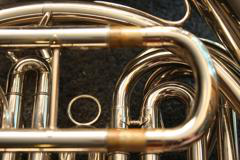

In [77]:
il[0]

In [78]:
il[:1]

[<PIL.Image.Image image mode=RGB size=240x160 at 0x116F56BA8>]

# Split validation set

In [79]:
fn = il.items[0]; fn

PosixPath('imagenette-160/train/n03394916/n03394916_58454.JPEG')

In [80]:
fn.parent.parent.name

'train'

In [81]:
def grandparent_splitter(fn, valid_name='valid', train_name='train'):
    gp = fn.parent.parent.name
    return True if gp==valid_name else False if gp==train_name else None

def split_by_func(ds, f):
    items = ds.items
    mask = [f(o) for o in items]
    # None values will be filtered out
    train = [o for o,m in zip(items, mask) if m==False]
    valid = [o for o,m in zip(items, mask) if m==True]
    return train,valid

In [83]:
from functools import partial

splitter = partial(grandparent_splitter, valid_name='val')

In [84]:
%time train,valid = split_by_func(il, splitter)

CPU times: user 50.7 ms, sys: 1.97 ms, total: 52.7 ms
Wall time: 53.7 ms


In [85]:
len(train), len(valid)

(12894, 500)